In [13]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras import layers, models
from PIL import Image
# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory
print(tf.version.VERSION)
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

2.12.0
/kaggle/input/27-class-sign-language-dataset/Y.npy
/kaggle/input/27-class-sign-language-dataset/X.npy
/kaggle/input/image1/IMG_3345.jpg


In [68]:
file_path_X = '/kaggle/input/27-class-sign-language-dataset/X.npy'
file_path_Y = '/kaggle/input/27-class-sign-language-dataset/Y.npy'

# Read the npy file using NumPy
npy_array_X = np.load(file_path_X)
npy_array_Y = np.load(file_path_Y)

# Define your string labels
string_labels = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', 'a', 'b', 'c', 'd', 'e', 'bye', 'good',
                 'good morning', 'hello', 'little bit', 'no', 'pardon', 'please', 'project', 'whats up', 'yes', 'NULL']

# Create a dictionary to map string labels to integers
label_to_int = {label: i for i, label in enumerate(string_labels)}
print(label_to_int)
# Convert the labels in npy_array_Y to integers

integer_labels = np.array([label_to_int[label[0]] for label in npy_array_Y])


# Convert the NumPy arrays to TensorFlow tensors
npy_tensor_X = tf.convert_to_tensor(npy_array_X)
npy_tensor_Y = tf.convert_to_tensor(integer_labels)


{'0': 0, '1': 1, '2': 2, '3': 3, '4': 4, '5': 5, '6': 6, '7': 7, '8': 8, '9': 9, 'a': 10, 'b': 11, 'c': 12, 'd': 13, 'e': 14, 'bye': 15, 'good': 16, 'good morning': 17, 'hello': 18, 'little bit': 19, 'no': 20, 'pardon': 21, 'please': 22, 'project': 23, 'whats up': 24, 'yes': 25, 'NULL': 26}


In [69]:
if len(npy_tensor_X.shape) == 4:
    print("The npy file contains image data.")
    print("Number of images:", npy_tensor_X.shape[0])
    print("Height of each image:", npy_tensor_X.shape[1])
    print("Width of each image:", npy_tensor_X.shape[2])
    print("Number of channels per image:", npy_tensor_X.shape[3])
else:
    print("The npy file does not contain image data.")
    
    

# Check the npy_tensor_Y for the labels

if len(npy_tensor_Y.shape) == 2:
    print("Number of labels:", npy_tensor_Y.shape[0])
    print("lables:", npy_tensor_Y.shape[1])

The npy file contains image data.
Number of images: 22801
Height of each image: 128
Width of each image: 128
Number of channels per image: 3


Just Check whether the file had images, how many images, and determine the dimensions of said images.

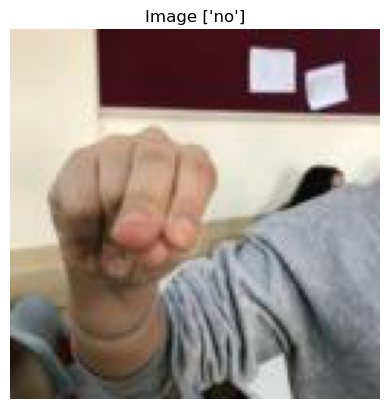

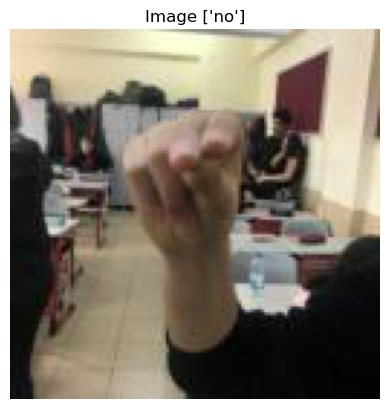

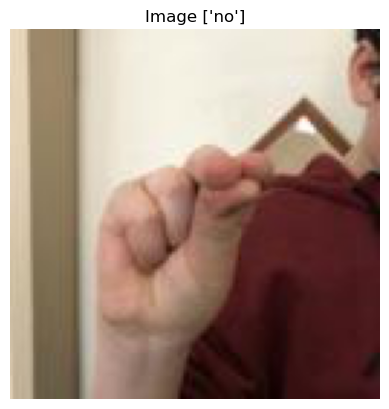

In [70]:
if len(npy_array_X.shape) == 4 and len(npy_array_Y.shape) == 2:
    num_images = npy_array_X.shape[0]

    # Loop through each image and plot it
    for i in range(2000,2003):
        plt.imshow(npy_array_X[i])
        plt.title(f"Image {npy_array_Y[i]}")

        plt.axis('off')
        plt.show()
else:
    print("The npy file does not contain image data.")

Display the images and check the different handsigns that have been provided

In [71]:
def create_cnn_model(input_shape, num_classes):
    model = models.Sequential()

    # Convolutional layers
    model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=input_shape))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(64, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))
    model.add(layers.Conv2D(128, (3, 3), activation='relu'))
    model.add(layers.MaxPooling2D((2, 2)))

    # Flatten the output to feed into the dense layers
    model.add(layers.Flatten())

    # Dense layers
    model.add(layers.Dense(64, activation='relu'))
    model.add(layers.Dropout(0.5))  # Optional dropout layer for regularization
    model.add(layers.Dense(num_classes, activation='softmax'))

    return model

In [80]:
# Training Ratio, Validation Ratio, Testing Ratio
Training_ratio = 0.6
Validation_ratio = 0.2
Testing_ratio = 0.4
dataset_size = npy_tensor_X.shape[0]

# Replace these with your preprocessed data
train_images, train_labels = npy_tensor_X[:int(dataset_size * Training_ratio)], npy_tensor_Y[:int(dataset_size * Training_ratio)]
valid_images, valid_labels = npy_tensor_X[:int(dataset_size * Validation_ratio)], npy_tensor_Y[:int(dataset_size * Validation_ratio)]
test_images, test_labels = npy_tensor_X[:int(dataset_size * Testing_ratio)], npy_tensor_Y[:int(dataset_size * Testing_ratio)]

# Define input shape and number of classes
input_shape = train_images[0].shape
num_classes = 27

In [81]:
model = create_cnn_model(input_shape, num_classes)

# Compile the model with an appropriate optimizer, loss function, and metrics
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [82]:
# Replace batch_size and epochs with your desired values
batch_size = 32
epochs = 10

# Train the model on the training data
model.fit(train_images, train_labels, batch_size=batch_size, epochs=epochs)


Epoch 1/10
428/428 [==============================] - 235s 546ms/step - loss: 2.7413 - accuracy: 0.1558
Epoch 2/10
428/428 [==============================] - 240s 560ms/step - loss: 1.8173 - accuracy: 0.3734
Epoch 3/10
428/428 [==============================] - 236s 551ms/step - loss: 1.3987 - accuracy: 0.4946
Epoch 4/10
428/428 [==============================] - 239s 558ms/step - loss: 1.1578 - accuracy: 0.5796
Epoch 5/10
428/428 [==============================] - 236s 552ms/step - loss: 1.0093 - accuracy: 0.6311
Epoch 6/10
428/428 [==============================] - 235s 548ms/step - loss: 0.8838 - accuracy: 0.6746
Epoch 7/10
428/428 [==============================] - 234s 547ms/step - loss: 0.7229 - accuracy: 0.7265
Epoch 9/10
428/428 [==============================] - 235s 549ms/step - loss: 0.6445 - accuracy: 0.7538
Epoch 10/10
428/428 [==============================] - 235s 549ms/step - loss: 0.5855 - accuracy: 0.7780


In [ ]:
# Evaluate the model on the test data
weights_and_biases = model.get_weights()
accuracy_values = [0.1558, 0.3734, 0.4946, 0.5796, 0.6311, 0.6746, 0.7265, 0.7538, 0.7780]
epochs_lst = [i for i in range(1,10)]

# test_loss, test_accuracy = model.evaluate(test_images, test_labels)
# print("Test Accuracy:", test_accuracy)
plt.plot(epochs_lst, accuracy_values, marker='o')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Model Accuracy on Training Set')
plt.grid(True)
plt.show()


In [4]:
def preprocess_image(image):
    # Resize the image to the input size required by the model (e.g., 224x224)
    image = cv2.resize(image, (128, 128))
    # Convert the image to a float32 array and normalize its values to [0, 1]
    image = image.astype(np.float32) / 255.0
    # Expand the dimensions to match the model's input shape (batch_size, height, width, channels)
    image = np.expand_dims(image, axis=0)
    return image

In [5]:
def predict_hand_sign(image):
    # Preprocess the image
    processed_image = preprocess_image(image)
    # Make the prediction using the model
    predictions = model.predict(processed_image)
    # Get the predicted class index (assuming it's a classification model)
    predicted_class_index = np.argmax(predictions)
    return predicted_class_index

In [ ]:
# Replace 'image_filename.jpg' with the actual filename of your uploaded image
image_path = ""  # replace an image here and test if you want to see whether it works or not

# Load the image using PIL
image = Image.open(image_path)

desired_size = (128, 128)

# Resize the image using the nearest-neighbor interpolation to preserve pixel values
resized_image = image.resize(desired_size, Image.NEAREST)

# Convert the image to a NumPy array
image_array = np.array(resized_image)

# Normalize the pixel values to [0, 1]
normalized_image = image_array.astype(np.float32) / 255.0

preprocessed_image = np.expand_dims(normalized_image, axis=0)

predictions = model.predict(preprocessed_image)


predicted_class_index = np.argmax(predictions)



predicted_class_name = string_labels[predicted_class_index]

print(f'Predicted hand sign: {predicted_class_name}')